# Exploratory Data analysis 
This is EDA done on the imputed dataset done by Abhinav Tembulkar

### Importing Libraries

In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Data preprocessing

In [3]:
df = pd.read_csv('imputed_dataset.csv')
df.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,Location,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Job_Title,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
0,4168,11,4,45,3585,7,0,880,5,7,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
1,4168,11,4,45,3298,7,1,880,5,7,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
2,4168,11,4,45,3298,7,2,880,5,7,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
3,4168,11,4,45,3585,7,3,880,5,7,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
4,4168,11,4,45,3298,7,4,880,5,7,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0


In [4]:
#Renaming the questions in columns with relevant name

# Dictionary mapping old column names to new shorter names
column_rename_map = {
    'Duration (in seconds)': 'Duration',
    'What is your age (# years)?': 'Age',
    'What is your gender? - Selected Choice': 'Gender',
    'Location': 'Location',
    'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'Education',
    'Job_Title': 'JobTitle',
    'Select the title most similar to your current role (or most recent title if retired): - Other - Text': 'RoleTitleText',
    'What is the size of the company where you are employed?': 'CompanySize',
    'Approximately how many individuals are responsible for data science workloads at your place of business?': 'DataScienceTeamSize',
    'Does your current employer incorporate machine learning methods into their business?': 'MLIncorporation',
    'Select any activities that make up an important part of your role at work: (Select all that apply) - Other - Text': 'WorkRoleActivitiesText',
    'What is your current yearly compensation (approximate $USD)?': 'YearlyCompensation',
    'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?': 'MLCloudSpending',
    'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (forums, blog, social media, etc)': 'FavMediaKaggle',
    'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)': 'FavMediaBlogs',
    'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Other - Text': 'FavMediaOtherText',
    'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera': 'CoursesCoursera',
    'On which platforms have you begun or completed data science courses? (Select all that apply) - Other - Text': 'CoursesOtherText',
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice': 'PrimaryToolSelected',
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Basic statistical software (Microsoft Excel, Google Sheets, etc.) - Text': 'PrimaryToolBasicStatText',
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Advanced statistical software (SPSS, SAS, etc.) - Text': 'PrimaryToolAdvStatText',
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Business intelligence software (Salesforce, Tableau, Spotfire, etc.) - Text': 'PrimaryToolBizIntelligenceText',
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Local development environments (RStudio, JupyterLab, etc.) - Text': 'PrimaryToolLocalDevText',
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Cloud-based data software & APIs (AWS, GCP, Azure, etc.) - Text': 'PrimaryToolCloudDataText',
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Other - Text': 'PrimaryToolOtherText',
    'How long have you been writing code to analyze data (at work or at school)?': 'CodeWritingExperience',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)': 'IDEsJupyter',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Other - Text': 'IDEsOtherText',
    'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Other - Text': 'HostedNotebooksOtherText',
    'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python': 'LanguagesPython',
    'What programming languages do you use on a regular basis? (Select all that apply) - Other - Text': 'LanguagesOtherText',
    'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice': 'RecommendedLangSelected',
    'What programming language would you recommend an aspiring data scientist to learn first? - Other - Text': 'RecommendedLangOtherText',
    'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Matplotlib ': 'VizToolsMatplotlib',
    'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Other - Text': 'VizToolsOtherText',
    'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - CPUs': 'HardwareCPUs',
    'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Other - Text': 'HardwareOtherText',
    'Have you ever used a TPU (tensor processing unit)?': 'UsedTPU',
    'For how many years have you used machine learning methods?': 'MLExperienceYears',
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression': 'MLAlgosLogisticReg',
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Decision Trees or Random Forests': 'MLAlgosDecisionTrees',
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Other - Text': 'MLAlgosOtherText',
    'Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Other - Text': 'MLToolsCategoriesOtherText',
    'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Other - Text': 'CVMethodsCategoriesOtherText',
    'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Other - Text': 'NLPMethodsOtherText',
    'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   Scikit-learn ': 'MLFrameworksScikit',
    'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Other - Text': 'MLFrameworksOtherText',
    'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Other - Text': 'CloudPlatformsOtherText',
    'Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Other - Text': 'CloudProductsOtherText',
    'Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Other - Text': 'BigDataProductsOtherText',
    'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Other - Text': 'MLProductsOtherText',
    'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Other - Text': 'AutoMLToolsOtherText',
    'Which of the following relational database products do you use on a regular basis? (Select all that apply) - Other - Text': 'DBProductsOtherText',
    #Other column renames here:
    'Unnamed: 0': 'Unnamed',
    'job_id': 'JobID',
    'company_name': 'CompanyName',
    'description': 'Description',
    'Salary_Max': 'SalaryMax',
    'pay_period': 'PayPeriod',
    'company_id': 'CompanyID',
    'views': 'Views',
    'Salary_Min': 'SalaryMin',
    'formatted_work_type': 'WorkType',
    'applies': 'Applies',
    'original_listed_time': 'ListedTime',
    'job_posting_url': 'JobPostingURL',
    'application_url': 'ApplicationURL',
    'application_type': 'ApplicationType',
    'expiry': 'Expiry',
    'formatted_experience_level': 'ExperienceLevel',
    'listed_time': 'ListedTime',
    'posting_domain': 'PostingDomain',
    'sponsored': 'Sponsored',
    'work_type': 'WorkType',
    'currency': 'Currency',
    'compensation_type': 'CompensationType',
    'normalized_salary': 'NormalizedSalary',
    'zip_code': 'ZipCode',
    'fips': 'FIPS'
}

# Rename columns
df.rename(columns=column_rename_map, inplace=True)

# Display the updated column names
print(df.columns)


Index(['Duration', 'Age', 'Gender',
       'What is your gender? - Prefer to self-describe - Text', 'Location',
       'Education', 'JobTitle', 'RoleTitleText', 'CompanySize',
       'DataScienceTeamSize',
       ...
       'Employment.Work Activity.Design',
       'Employment.Work Activity.Development',
       'Employment.Work Activity.Human Resources',
       'Employment.Work Activity.Managing/Supervising People/Projects',
       'Employment.Work Activity.Other',
       'Employment.Work Activity.Productions/Operations/Maintenance',
       'Employment.Work Activity.Professional Service',
       'Employment.Work Activity.Qualitity/Productivity Management',
       'Employment.Work Activity.Sales, Purchasing, Marketing',
       'Employment.Work Activity.Teaching'],
      dtype='object', length=334)


In [5]:
#Selecting the Relevant Columns
relevant_columns = [
    'Age', 
    'Gender', 
    'Location', 
    'Education', 
    'JobTitle', 
    'CompanySize', 
    'DataScienceTeamSize', 
    'MLIncorporation', 
    'YearlyCompensation', 
    'MLCloudSpending', 
    'CoursesCoursera', 
    'PrimaryToolSelected', 
    'CodeWritingExperience', 
    'LanguagesPython', 
    'MLExperienceYears', 
    'SalaryMax', 
    'SalaryMin', 
    'NormalizedSalary', 
    'WorkType', 
    'ExperienceLevel'
]

# Select the relevant columns from merged_df
selected_df = df[relevant_columns]

# Display the first few rows of the selected DataFrame
print(selected_df.head())

   Age  Gender  Location  Education  JobTitle  CompanySize  \
0   11       4      3585          7         0            5   
1   11       4      3298          7         1            5   
2   11       4      3298          7         2            5   
3   11       4      3585          7         3            5   
4   11       4      3298          7         4            5   

   DataScienceTeamSize  MLIncorporation  YearlyCompensation  MLCloudSpending  \
0                    7                6                  25                6   
1                    7                6                  25                6   
2                    7                6                  25                6   
3                    7                6                  25                6   
4                    7                6                  25                6   

   ...  PrimaryToolSelected  CodeWritingExperience  LanguagesPython  \
0  ...                    6                      7                1   
1  .

In [6]:
df.drop('What is your gender? - Prefer to self-describe - Text', axis=1, inplace=True)

In [7]:
df.columns

Index(['Duration', 'Age', 'Gender', 'Location', 'Education', 'JobTitle',
       'RoleTitleText', 'CompanySize', 'DataScienceTeamSize',
       'MLIncorporation',
       ...
       'Employment.Work Activity.Design',
       'Employment.Work Activity.Development',
       'Employment.Work Activity.Human Resources',
       'Employment.Work Activity.Managing/Supervising People/Projects',
       'Employment.Work Activity.Other',
       'Employment.Work Activity.Productions/Operations/Maintenance',
       'Employment.Work Activity.Professional Service',
       'Employment.Work Activity.Qualitity/Productivity Management',
       'Employment.Work Activity.Sales, Purchasing, Marketing',
       'Employment.Work Activity.Teaching'],
      dtype='object', length=333)

In [8]:
df.to_csv('imputed_renamed_dataset.csv', index=False)

### Data preprocessing

In [9]:
df = pd.read_csv('imputed_renamed_dataset.csv')
df.head()

,Duration,Age,Gender,Location,Education,JobTitle,RoleTitleText,CompanySize,DataScienceTeamSize,MLIncorporation,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
0,4168,11,4,3585,7,0,880,5,7,6,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
1,4168,11,4,3298,7,1,880,5,7,6,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
2,4168,11,4,3298,7,2,880,5,7,6,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
3,4168,11,4,3585,7,3,880,5,7,6,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
4,4168,11,4,3298,7,4,880,5,7,6,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0


In [10]:
df.columns

Index(['Duration', 'Age', 'Gender', 'Location', 'Education', 'JobTitle',
       'RoleTitleText', 'CompanySize', 'DataScienceTeamSize',
       'MLIncorporation',
       ...
       'Employment.Work Activity.Design',
       'Employment.Work Activity.Development',
       'Employment.Work Activity.Human Resources',
       'Employment.Work Activity.Managing/Supervising People/Projects',
       'Employment.Work Activity.Other',
       'Employment.Work Activity.Productions/Operations/Maintenance',
       'Employment.Work Activity.Professional Service',
       'Employment.Work Activity.Qualitity/Productivity Management',
       'Employment.Work Activity.Sales, Purchasing, Marketing',
       'Employment.Work Activity.Teaching'],
      dtype='object', length=333)

### Question 1
How effective are online learning platforms in improving job market readiness compared to traditional university degrees ?

<b>Hypothesis 1</b><br>
People who learn from online platforms like Coursera, in addition to traditional degrees, have higher salaries and job placement rates in their respective fields.

In [11]:
print(df.groupby(['Education', 'CoursesCoursera']).YearlyCompensation.describe())

                             count       mean       std   min    25%   50%  \
Education CoursesCoursera                                                    
0         0                 2646.0  15.182162  9.530494   0.0   5.00  18.0   
          1                 3399.0  17.075316  9.641159   0.0   8.00  25.0   
1         0                 1352.0  13.435651  8.407656   0.0   5.00  14.0   
          1                 1444.0  15.079640  9.532083   0.0   5.00  18.0   
2         0                   86.0  13.837209  9.075968   0.0   5.25  13.0   
          1                  247.0  17.388664  9.614244   0.0   9.50  25.0   
3         0                 4090.0  13.813203  8.819947   0.0   5.00  16.0   
          1                 4561.0  16.204780  9.361019   0.0   7.00  19.0   
4         0                   55.0  15.945455  9.244454   0.0   8.00  17.0   
          1                  178.0  17.578652  9.199422   0.0  10.00  24.0   
5         0                  256.0  11.800781  8.705833   0.0   

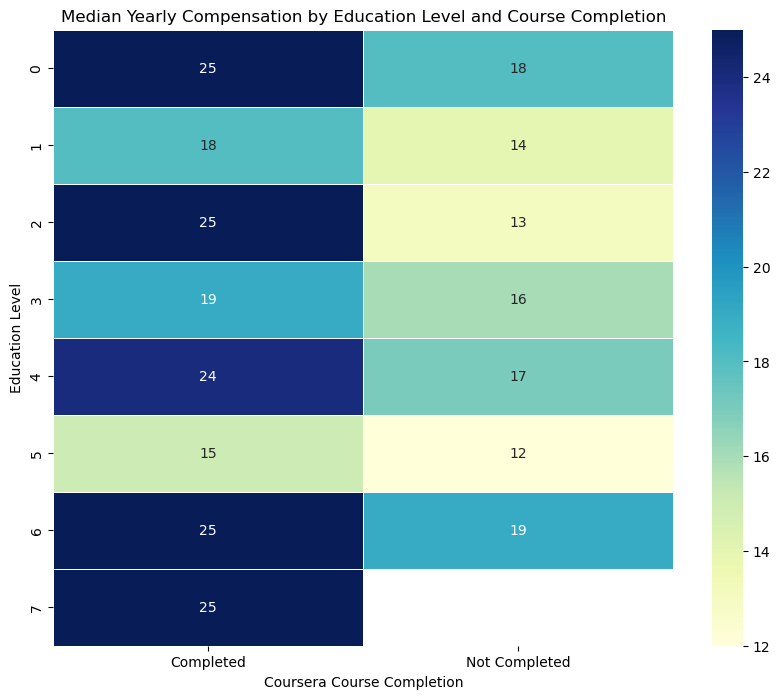

In [12]:
df['CoursesCourseraCat'] = df['CoursesCoursera'].apply(lambda x: 'Completed' if x == 1 else 'Not Completed')

# Create a pivot table for the heatmap
pivot_table = df.pivot_table(values='YearlyCompensation', index='Education', columns='CoursesCourseraCat', aggfunc='median')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Median Yearly Compensation by Education Level and Course Completion')
plt.xlabel('Coursera Course Completion')
plt.ylabel('Education Level')
plt.show()

The shade in the graph represents annual salary. The darker shades on 'completed' axis of the graph show that people who complete their coursera course have higher salaries.

<b> Conclusion </b><br>
This heatmap demonstrated importance of combining traditional education with online learning platforms like Coursera in terms of getting better compensation. This supports our hypothesis that continuous learning and skill enhancement can lead to better earning opportunities. This visualization shows the impact of online learning platforms across various levels of conventional education, highlighting the benefits of additional certifications and courses.

<b>Hypothesis 2</b><br>
Learning from online platforms helps professionals gain more Machine Learning experience in their respective job titles. This occurs because online platforms supplements formal education by providing more up-to-date knowledge and more practical experience.

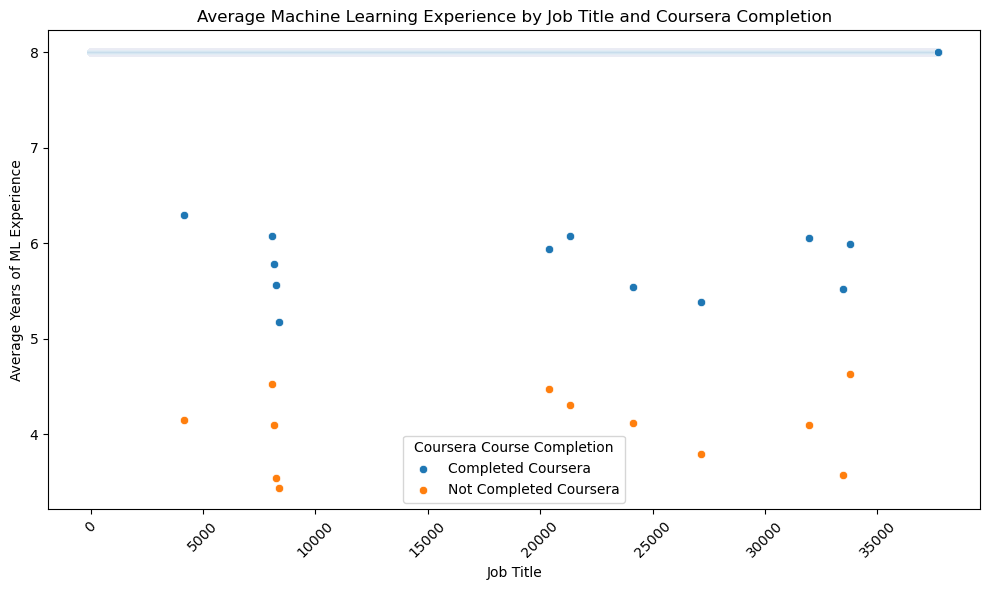

In [13]:
# Filter and prepare data
df_filtered = df[df['CoursesCoursera'] == 1]  # Filter for those who completed Coursera courses
df_not_completed = df[df['CoursesCoursera'] == 0]  # Filter for those who did not complete Coursera courses

# Group by JobTitle and calculate average ML experience
avg_exp_completed = df_filtered.groupby('JobTitle')['MLExperienceYears'].mean().reset_index()
avg_exp_not_completed = df_not_completed.groupby('JobTitle')['MLExperienceYears'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_exp_completed, x='JobTitle', y='MLExperienceYears', marker='o', label='Completed Coursera')
sns.scatterplot(data=avg_exp_not_completed, x='JobTitle', y='MLExperienceYears', marker='o', label='Not Completed Coursera')
plt.xticks(rotation=45)
plt.title('Average Machine Learning Experience by Job Title and Coursera Completion')
plt.xlabel('Job Title')
plt.ylabel('Average Years of ML Experience')
plt.legend(title='Coursera Course Completion')
plt.tight_layout()
plt.show()


Across all job titles, we can see that people who learn from online platforms like coursera, have higher ML experience. 

<b>Conclusion</b><br>
This graph shows a strong correlation between completing courses on online platforms such as Coursera and average ML experience years. This analysis suports our hypothesis that by engaging in learning from online platforms like Coursera, people effectively supplement formal education and become more job market ready. This suggests that an individual wanting to get more job experience in ML field, should actively engage in learning through online learning platforms.

## Question 2
How does geographic location affect job opportunities, and should relocation be considered for career growth?

<b>Hypothesis</b><br>
Regions with higher concentrations of tech and finance sectors offer significantly higher median salaries and more job opportunities, making relocation a good strategy for career growth.

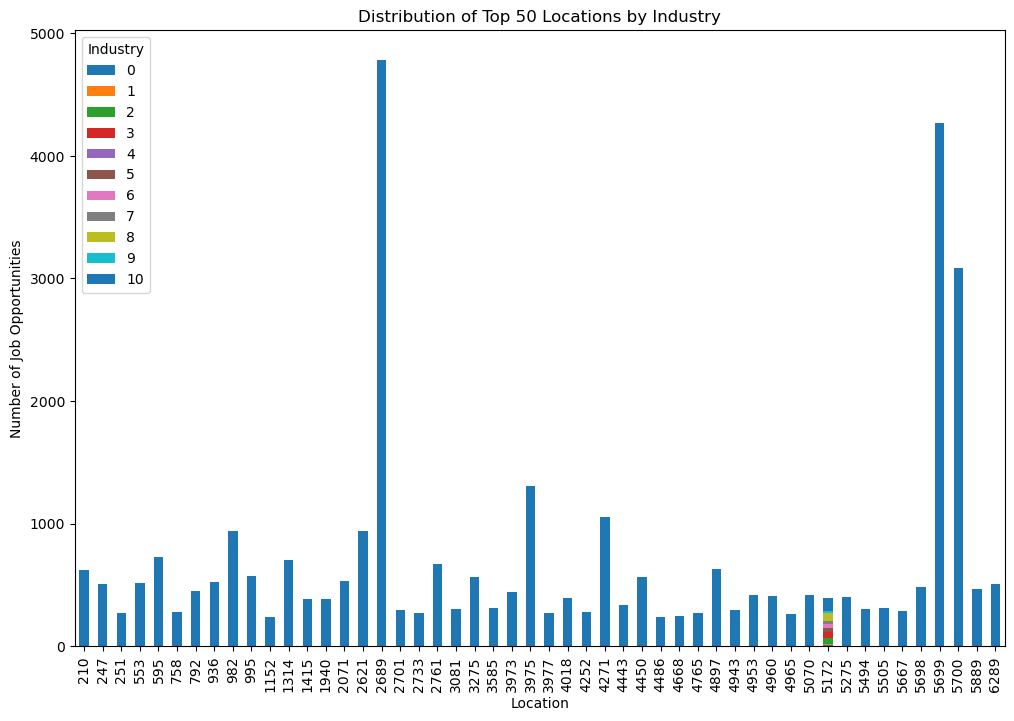

In [14]:
# Filter for top N locations based on some criterion, e.g., total job opportunities
top_locations = df.groupby('Location').size().nlargest(50).index
filtered_data = df[df['Location'].isin(top_locations)]


# Group and plot
plot_data = filtered_data.groupby(['Location', 'Industry']).size().unstack(fill_value=0)
plot_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Top 50 Locations by Industry')
plt.ylabel('Number of Job Opportunities')
plt.show()


In [22]:
top_locations

Index([2689, 5699, 5700, 3975, 4271,  982, 2621,  595, 1314, 2761, 4897,  210,
        995, 3275, 4450, 2071,  936,  553, 6289,  247, 5698, 5889,  792, 3973,
       4953, 5070, 4960, 5275, 5172, 4018, 1415, 1940, 4443, 3585, 5505, 3081,
       5494, 4943, 2701, 5667,  758, 4252, 2733,  251, 4765, 3977, 4965, 4668,
       4486, 1152],
      dtype='int64', name='Location')

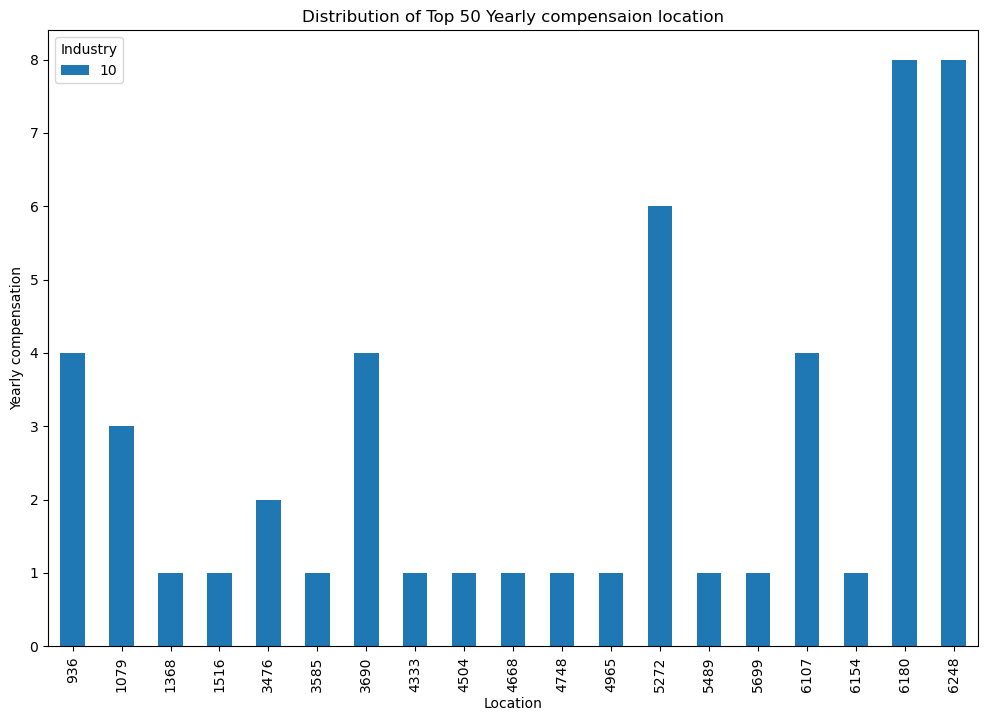

In [20]:
filtered_data = df.sort_values(by='YearlyCompensation', ascending=False).head(50)

# Group and plot
plot_data = filtered_data.groupby(['Location', 'Industry']).size().unstack(fill_value=0)
plot_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Top 50 Yearly compensaion location')
plt.ylabel('Yearly compensation')
plt.show()


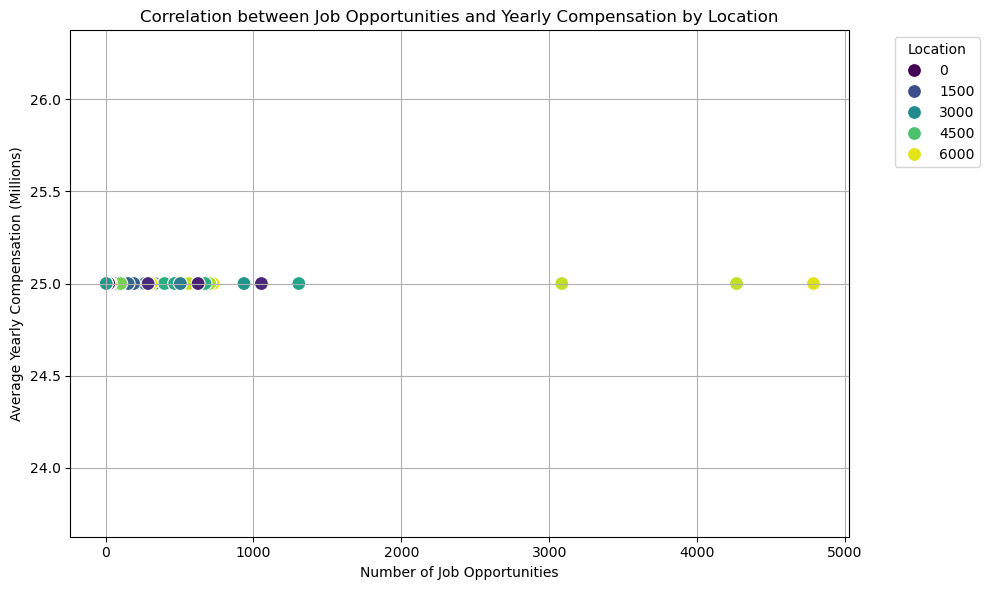

Correlation coefficient: nan


/Users/future/anaconda3/envs/dic/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/future/anaconda3/envs/dic/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [24]:

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
df['JobOpportunities'] = df.groupby('Location').size()
sns.scatterplot(data=df, x='JobOpportunities', y='YearlyCompensation', hue='Location', palette='viridis', s=100)

# Adding titles and labels
plt.title('Correlation between Job Opportunities and Yearly Compensation by Location')
plt.xlabel('Number of Job Opportunities')
plt.ylabel('Average Yearly Compensation (Millions)')
plt.grid(True)

# Display the plot
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate and print the correlation coefficient
correlation = df['JobOpportunities'].corr(df['YearlyCompensation'])
print(f"Correlation coefficient: {correlation:.2f}")

(array([ 2954.,  1259.,  1375.,   696.,   870.,   810.,  1567.,  1300.,
         1374., 70637.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

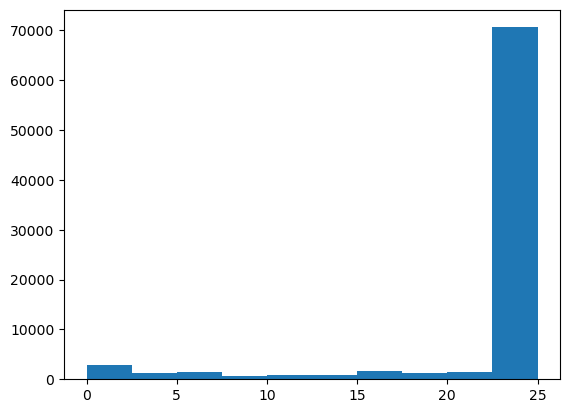

In [27]:
plt.hist(df['YearlyCompensation'])